In [2]:
pip install pandas numpy scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder

In [16]:
file_path = 'Sales Transaction v.4a.csv'  # Use the correct file path here
df_cleaned = pd.read_csv(file_path)

# checking the columns names
print(df_cleaned.columns)

Index(['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price',
       'Quantity', 'CustomerNo', 'Country'],
      dtype='object')


In [18]:
df = pd.read_csv('Sales Transaction v.4a.csv')
df.head()  # Check the first few rows of the dataset

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [46]:
# Step 1: Drop 'CustomerNo', 'TransactionNo', and handle 'ProductNo' (convert it with LabelEncoder)
le = LabelEncoder()
df_cleaned['ProductNo'] = le.fit_transform(df_cleaned['ProductNo'])

# Drop other irrelevant columns
if 'Country' in df_cleaned.columns:
    X = df_cleaned.drop(columns=['Price', 'Date', 'Country', 'CustomerNo', 'TransactionNo', 'ProductName'])
else:
    X = df_cleaned.drop(columns=['Price', 'Date', 'CustomerNo', 'TransactionNo', 'ProductName'])

# Target variable to predict (Price)
y = df_cleaned['Price']


In [48]:

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
# Step 3: Build and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
lin_mape = mean_absolute_percentage_error(y_test, y_pred_lin)


In [52]:
# Step 4: Build and train the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
tree_mape = mean_absolute_percentage_error(y_test, y_pred_tree)

In [54]:
# Step 5: Build and train the Random Forest Regressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)
forest_mape = mean_absolute_percentage_error(y_test, y_pred_forest)

In [55]:
# Step 6: Print the MAPE values for each model
print(f"MAPE for Linear Regression: {lin_mape}")
print(f"MAPE for Decision Tree: {tree_mape}")
print(f"MAPE for Random Forest: {forest_mape}")

MAPE for Linear Regression: 0.2651303191301836
MAPE for Decision Tree: 0.1367472528335027
MAPE for Random Forest: 0.13666958536955795


/var/folders/wl/3gchln_53p3gsd192k8y3nyc0000gn/T/ipykernel_19940/107534974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mape_values, palette='viridis')


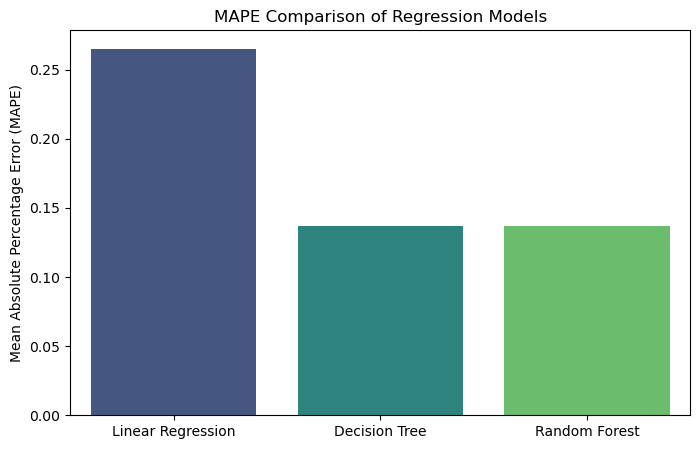

In [57]:
# Step 7: Visualize the MAPE for each model (Bar Chart)
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mape_values = [lin_mape, tree_mape, forest_mape]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=mape_values, palette='viridis')
plt.title("MAPE Comparison of Regression Models")
plt.ylabel("Mean Absolute Percentage Error (MAPE)")
plt.show()

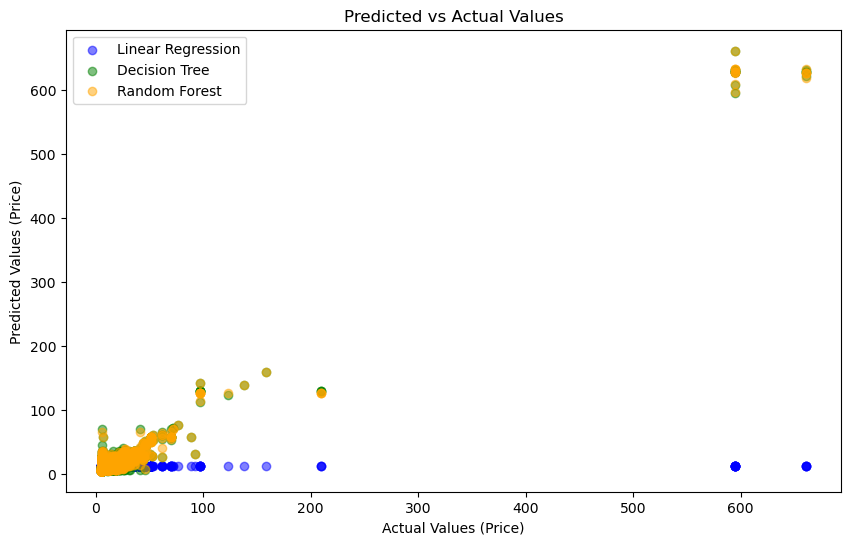

In [58]:
# Step 8: Plot Predicted vs Actual Values (Scatter Plot)
plt.figure(figsize=(10, 6))

# Scatter plot for Linear Regression
plt.scatter(y_test, y_pred_lin, label="Linear Regression", alpha=0.5, color='blue')

# Scatter plot for Decision Tree
plt.scatter(y_test, y_pred_tree, label="Decision Tree", alpha=0.5, color='green')

# Scatter plot for Random Forest
plt.scatter(y_test, y_pred_forest, label="Random Forest", alpha=0.5, color='orange')

plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values (Price)')
plt.ylabel('Predicted Values (Price)')
plt.legend()
plt.show()

/var/folders/wl/3gchln_53p3gsd192k8y3nyc0000gn/T/ipykernel_19940/4094787136.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=lin_coef, palette='viridis')


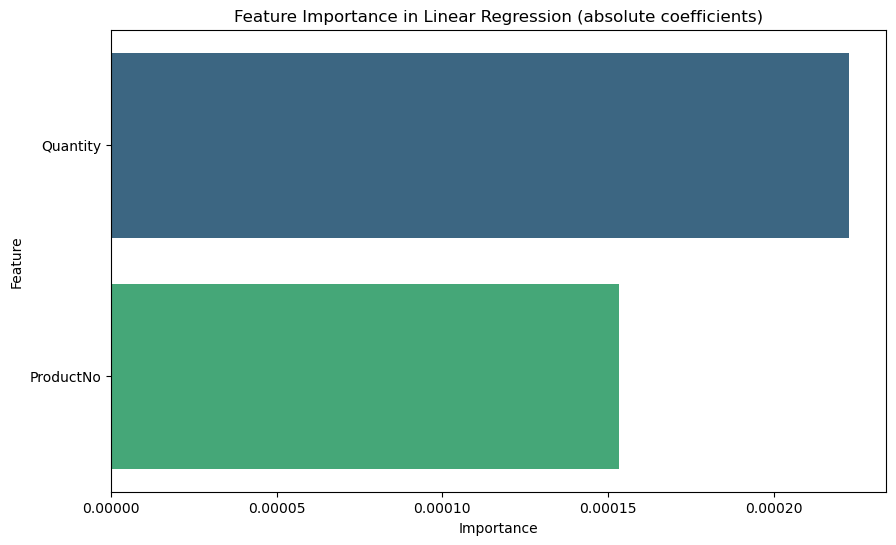

In [59]:
# Step 9a: Feature Importance for Linear Regression (coefficients)
lin_coef = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(lin_reg.coef_)}).sort_values(by='Importance', ascending=False)

# Visualize the feature importance for Linear Regression
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=lin_coef, palette='viridis')
plt.title("Feature Importance in Linear Regression (absolute coefficients)")
plt.show()


/var/folders/wl/3gchln_53p3gsd192k8y3nyc0000gn/T/ipykernel_19940/3541567472.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=tree_importances, palette='viridis')


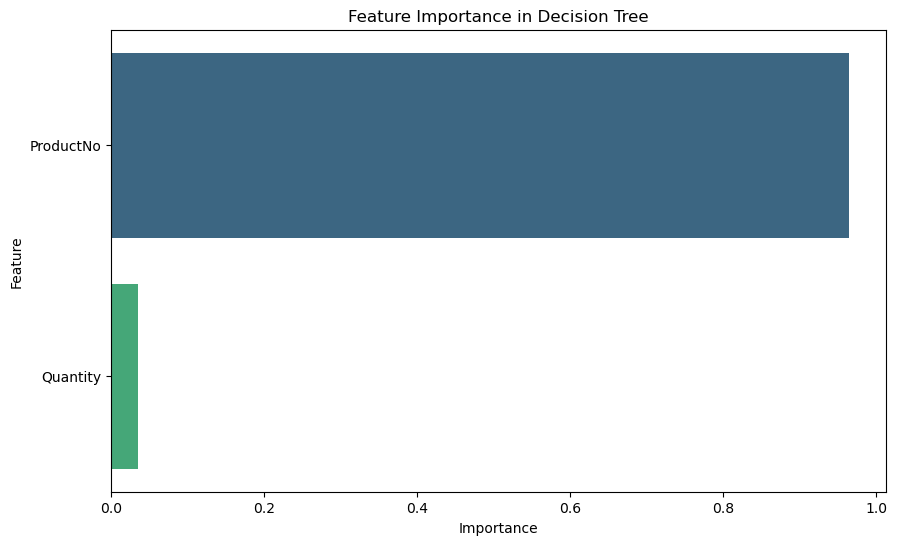

In [60]:
# Step 9b: Feature Importance for Decision Tree
tree_importances = pd.DataFrame({'Feature': X.columns, 'Importance': tree_reg.feature_importances_}).sort_values(by='Importance', ascending=False)

# Visualize the feature importance for Decision Tree
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=tree_importances, palette='viridis')
plt.title("Feature Importance in Decision Tree")
plt.show()


/var/folders/wl/3gchln_53p3gsd192k8y3nyc0000gn/T/ipykernel_19940/3079510571.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=forest_importances, palette='viridis')


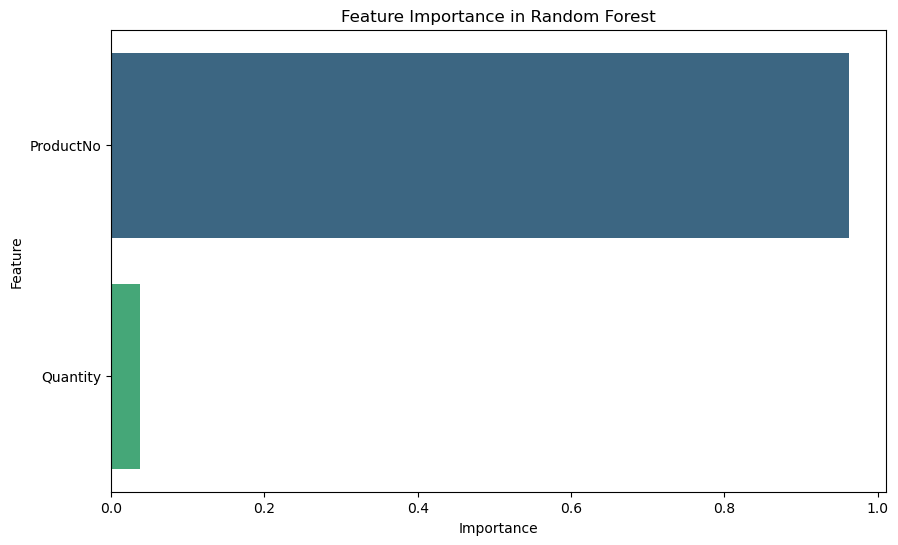

In [61]:
# Step 9c: Feature Importance for Random Forest
forest_importances = pd.DataFrame({'Feature': X.columns, 'Importance': forest_reg.feature_importances_}).sort_values(by='Importance', ascending=False)

# Visualize the feature importance for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=forest_importances, palette='viridis')
plt.title("Feature Importance in Random Forest")
plt.show()

In [73]:
print(df.dtypes)
print(df.isnull().sum())
df.describe()
numeric_df = df.select_dtypes(include=['float64', 'int64'])

TransactionNo     object
Date              object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object
TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64


In [75]:
corr = numeric_df.corr()

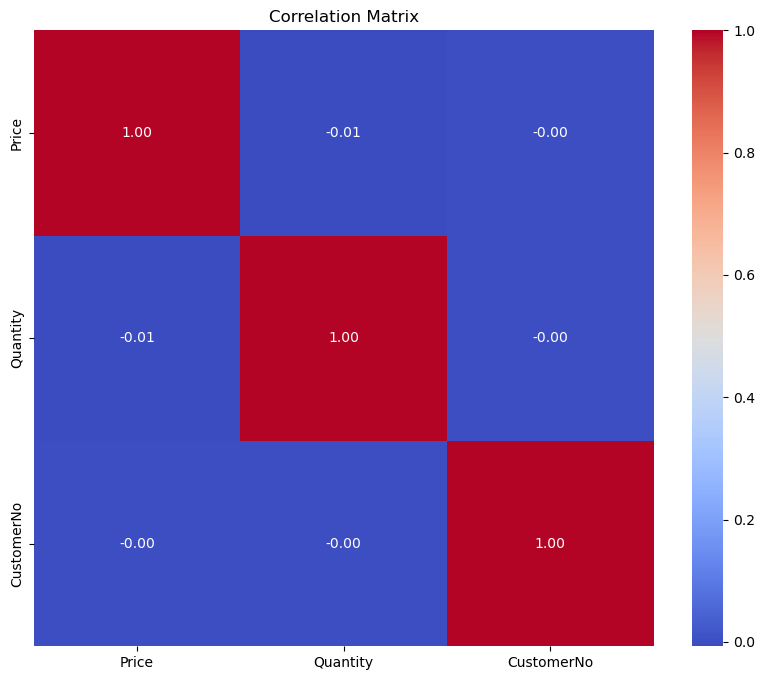

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()